In [1]:
import cell2cell as c2c
import numpy as np
%matplotlib inline


# Load RNA-seq data

In [2]:
# load RNA-seq data
import pandas as pd
rnaseq_data = pd.read_excel('/home/hsher/c2c_output/hema_stroma_rnaseq.xlsx')
rnaseq_data.shape

(2466, 45)

In [24]:
rnaseq_data.head()

,gene_id,25,26,27,37,23,36,42,41,43,...,20,12,11,22,19,16,18,17,21,14
0,A1BG,0.003331,0.000953,0.001096,0.000000,0.003516,0.000000,0.004463,0.005090,0.004167,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,A2M,0.000000,0.000000,0.001450,0.000000,0.000454,0.000000,0.000000,0.000000,0.000984,...,0.000000,0.000000,0.007737,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,ABCA1,0.000543,0.003103,0.000428,0.004482,0.006616,0.001976,0.011550,0.000000,0.001032,...,0.051580,0.000000,0.015965,0.0,0.0,0.086541,0.000000,0.000000,0.0,0.005841
3,ABCA12,0.000000,0.000912,0.000850,0.000000,0.000000,0.000000,0.001393,0.000000,0.000000,...,0.000000,0.028692,0.001637,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,ABCA7,0.071662,0.012310,0.040699,0.010268,0.004845,0.022629,0.017366,0.003286,0.020852,...,0.027956,0.021961,0.026408,0.0,0.0,0.000000,0.012598,0.019244,0.0,0.012420


In [4]:
# build id lookup table using mygene (because GO enrich is based on Ensembl ID. We first find id for all proteins)
lookup_table =  c2c.analysis.build_id_lookup(rnaseq_data, rnaseq_col = 'gene_id', species = 9606)

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-2466...done.
Finished.
6 input query terms found dup hits:
	[('IGHA1', 3), ('IGHD', 3), ('IGHM', 3), ('KIR3DX1', 5), ('TRAC', 2), ('TRBC1', 3)]
19 input query terms found no hit:
	['C3orf58', 'C4orf26', 'CTGF', 'CXorf36', 'CYR61', 'FAM19A4', 'FAM213A', 'GIF', 'GUCY1A3', 'GUCY1B3'
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


# load cell2cell interaction matrix

In [5]:
# import cell2cell2 interaction matrix
import pandas as pd
mean_matrix_75 = pd.read_pickle('/home/hsher/c2c_output/hema_stroma_75')

In [6]:
mean_matrix_75.head()

,39;18,33;1,7;2,15;41,2;38,39;37,40;3,42;27,16;43,30;32,...,9;16,35;31,41;27,3;38,34;17,4;29,30;5,5;21,21;42,19;13
"(KCNIP1, KCNIP2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(FBLN5, SERPINE1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(ELN, LOX)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(ELN, FBN2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(COL4A3, ITGA3)",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Build Gene Symbol to ID lookup table

In [7]:
lookup_table.head()

,_id,_score,entrezgene,notfound
query,,,,
A1BG,1,94.196945,1,NaN
A2M,2,91.203130,2,NaN
ABCA1,19,89.636635,19,NaN
ABCA12,26154,86.149370,26154,NaN
ABCA7,10347,88.240616,10347,NaN


In [8]:
meta = pd.read_excel('/home/hsher/c2c_output/hema_stroma_metadata.xlsx')

In [9]:
meta

,Unnamed: 0,old cluster,FACs annotation,dataset,Cell cluster
0,0,0,Adipocyte progenitor,stroma,0
1,1,1,MSC,stroma,1
2,2,2,Early Erythro,stroma,2
3,3,3,MSC-Osteo,stroma,3
4,4,4,Pro-osteoblast,stroma,4
5,5,5,Lymphocyte,stroma,5
6,6,6,Osteoblast progenitor,stroma,6
7,7,7,Erythrocyte,stroma,7
8,8,8,Early Erythro,stroma,8
9,9,9,Pre-adipocyte,stroma,9


# Run interacting protein GO term enrichment

In [10]:
f_cell, s_cell = c2c.analysis.enriched_interaction(mean_matrix_75, lookup_table, cell_one = 0, cell_two = 28)

/home/hsher/miniconda3/envs/cell2cell/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


size of subset gene2go of gene2go is (64088, 8)


/home/hsher/miniconda3/envs/cell2cell/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


size of subset gene2go of gene2go is (64088, 8)


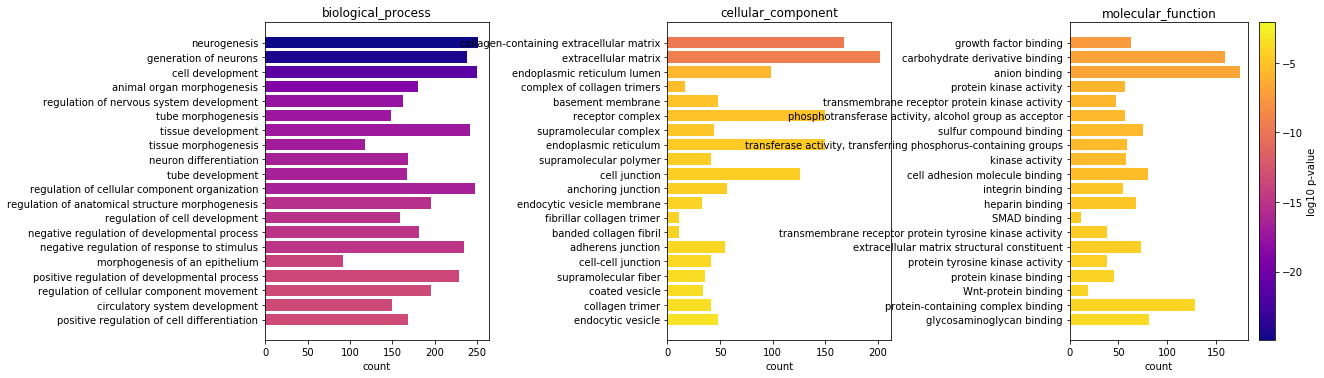

In [14]:
c2c.analysis.bar_go(f_cell) # adipocyte progenitor

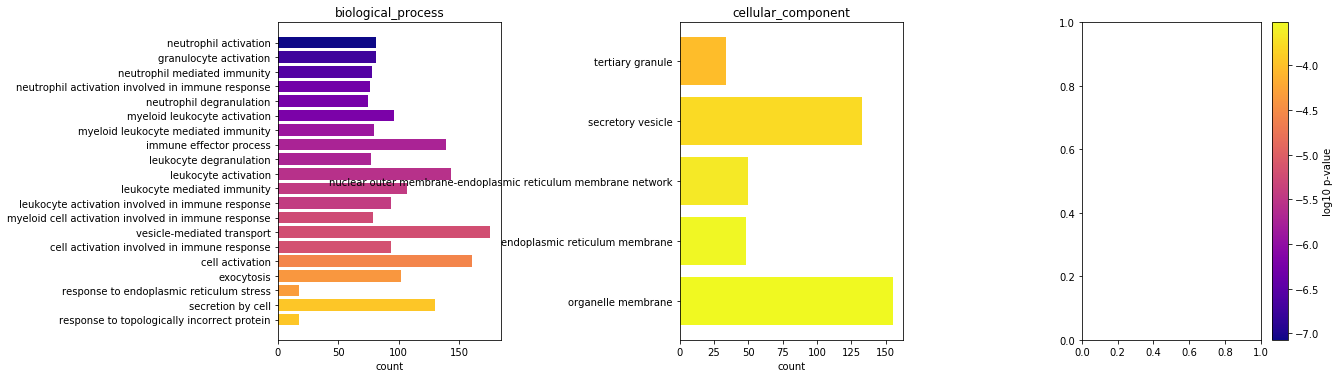

In [15]:
c2c.analysis.bar_go(s_cell) # lymphocyte

## GO term layout by GOenrich package

![interating protein on cell4's side](0_stromato5_hema.png)

![interating protein on cell9's side](5_hemato0_stroma.png)

In [16]:
cell_1, cell_17 = c2c.analysis.enriched_interaction(mean_matrix_75, lookup_table, cell_one = '10_stroma', cell_two = '8_hema') # endothelial, HSPC

/home/hsher/miniconda3/envs/cell2cell/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


size of subset gene2go of gene2go is (64088, 8)


/home/hsher/miniconda3/envs/cell2cell/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


size of subset gene2go of gene2go is (64088, 8)


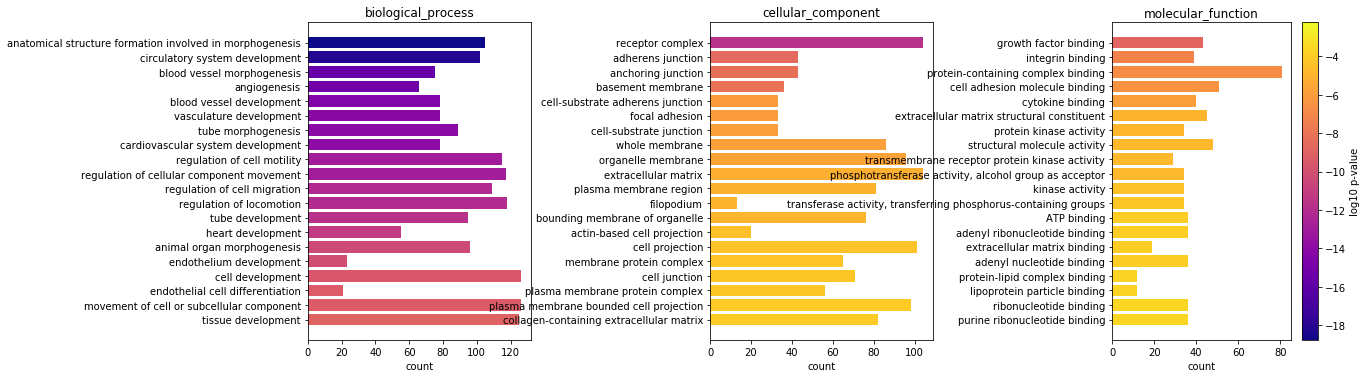

In [17]:
c2c.analysis.bar_go(cell_1) # endothelium

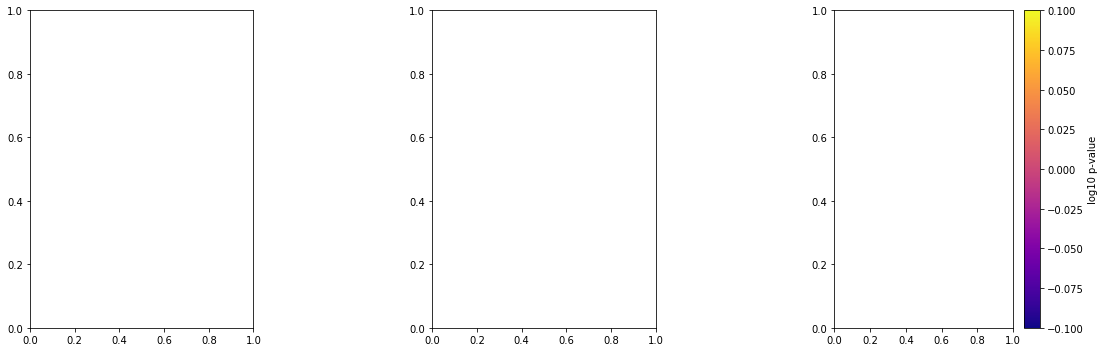

In [18]:
c2c.analysis.bar_go(cell_17) # HSPC

## GO term layout by GOenrich package
here we show the calculation for cell 1 and cell 17's interacting protein
all protein on cell 8's side
![interating protein on cell4's side](10_stromato8_hema.png)
all protein on cell 12's side
![interating protein on cell9's side](8hemato10_stroma.png)

/home/hsher/miniconda3/envs/cell2cell/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


size of subset gene2go of gene2go is (64088, 8)


/home/hsher/miniconda3/envs/cell2cell/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


size of subset gene2go of gene2go is (64088, 8)


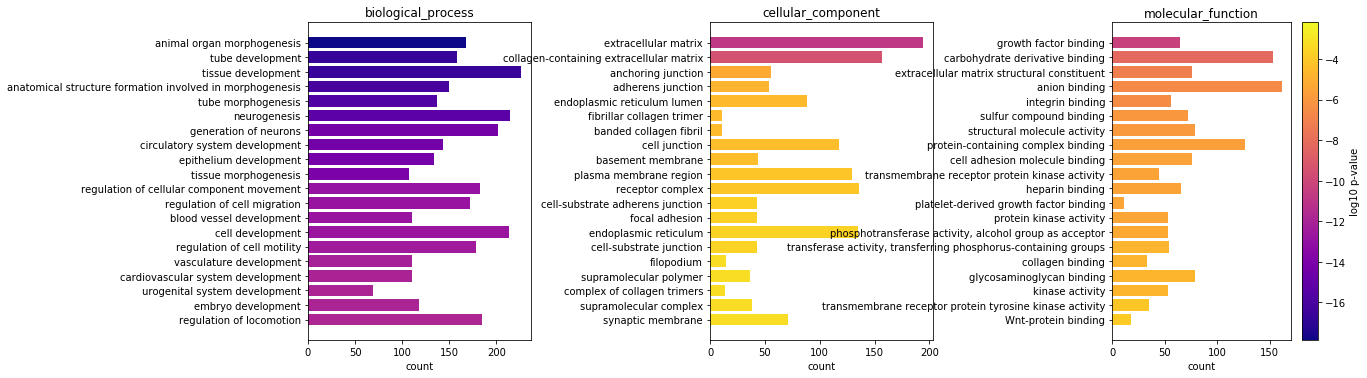

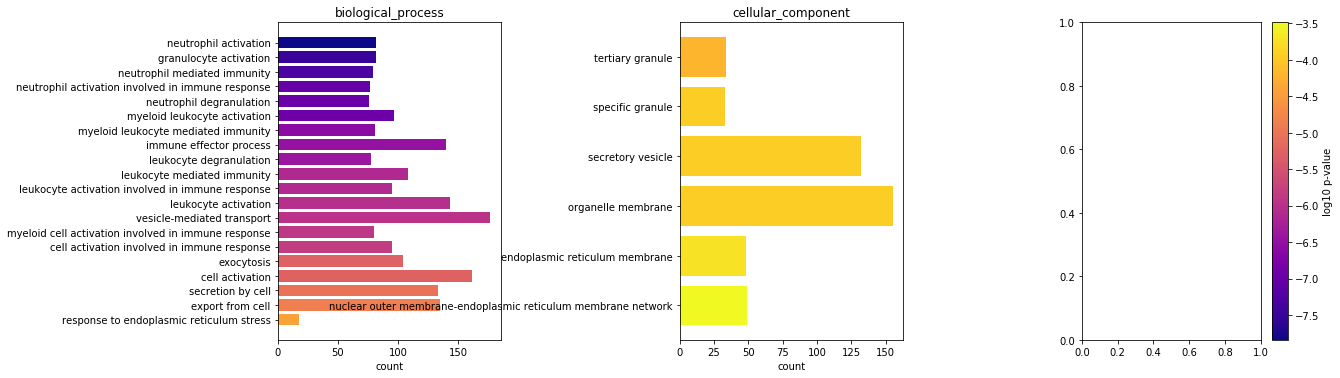

In [20]:
cell_8, cell_0 = c2c.analysis.enriched_interaction(mean_matrix_75, lookup_table, cell_one = '1_stroma', cell_two = '5_hema') # MSC vs GMP
c2c.analysis.bar_go(cell_8)
c2c.analysis.bar_go(cell_0)

![interating protein on cell4's side](0to8.png)
all protein on cell 12's side
![interating protein on cell9's side](8to0.png)

In [11]:
all_protein = c2c.analysis.all_pairs_interaction(mean_matrix_75)

# look it in pseudotime analysis

In [36]:
def read_dpt(csv_file):
    df = pd.read_csv(csv_file, header = 0, index_col = 0)
    return(df)
baso = read_dpt("/home/hsher/scSecretome/secP_notebook/Baso_dpt_secmem.csv")
erythro = read_dpt("/home/hsher/scSecretome/secP_notebook/Erythrocyte_dpt_secmem.csv")
granulo = read_dpt("/home/hsher/scSecretome/secP_notebook/Gran_dpt_secmem.csv")
ly = read_dpt("/home/hsher/scSecretome/secP_notebook/Ly_dpt_secmem.csv")
meg = read_dpt("/home/hsher/scSecretome/secP_notebook/Meg_dpt_secmem.csv")


Text(0, 0.5, 'RNA intensity')

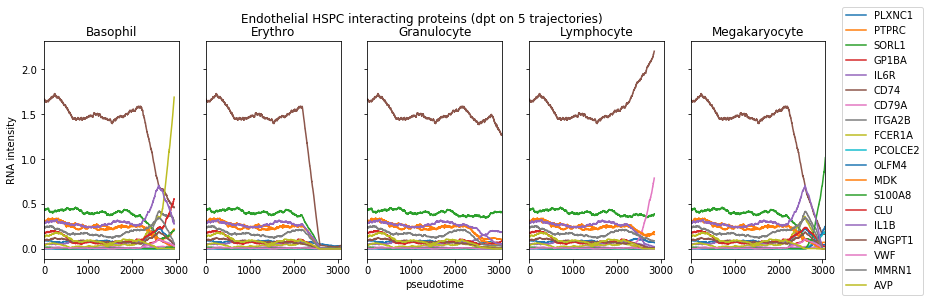

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 5, figsize = (14, 4), sharex = True, sharey = True)
p = all_protein[31, 10, 0].union(all_protein[31, 10, 1])
baso.loc[:,baso.columns.isin(p)].plot(ax = ax[0], title = "Basophil")
erythro.loc[:,erythro.columns.isin(p)].plot(ax = ax[1], title = "Erythro")
granulo.loc[:,granulo.columns.isin(p)].plot(ax = ax[2], title = "Granulocyte")
ly.loc[:,ly.columns.isin(p)].plot(ax = ax[3], title = "Lymphocyte")
meg.loc[:,ly.columns.isin(p)].plot(ax = ax[4], title = "Megakaryocyte")

[a.get_legend().remove() for a in ax]

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
fig.suptitle("Endothelial HSPC interacting proteins (dpt on 5 trajectories)")
ax[2].set_xlabel("pseudotime")
ax[0].set_ylabel("RNA intensity")

Text(0, 0.5, 'RNA intensity')

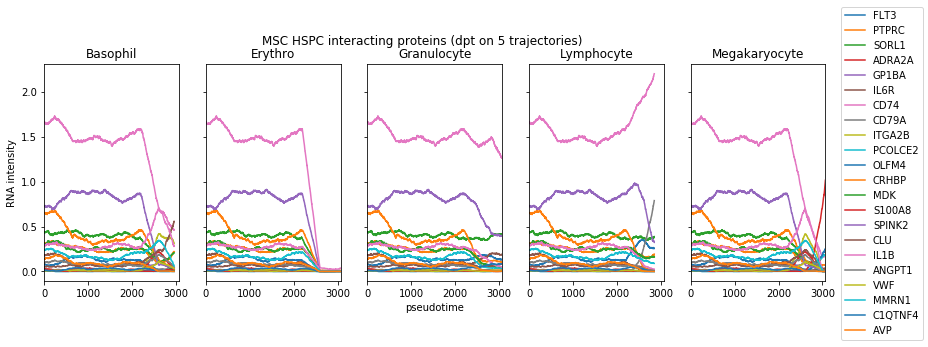

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 5, figsize = (14, 4), sharex = True, sharey = True)
p = all_protein[31, 1, 0].union(all_protein[31, 1, 1]) # MSC
baso.loc[:,baso.columns.isin(p)].plot(ax = ax[0], title = "Basophil")
erythro.loc[:,erythro.columns.isin(p)].plot(ax = ax[1], title = "Erythro")
granulo.loc[:,granulo.columns.isin(p)].plot(ax = ax[2], title = "Granulocyte")
ly.loc[:,ly.columns.isin(p)].plot(ax = ax[3], title = "Lymphocyte")
meg.loc[:,ly.columns.isin(p)].plot(ax = ax[4], title = "Megakaryocyte")

[a.get_legend().remove() for a in ax]

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
fig.suptitle("MSC HSPC interacting proteins (dpt on 5 trajectories)")
ax[2].set_xlabel("pseudotime")
ax[0].set_ylabel("RNA intensity")

Text(0, 0.5, 'RNA intensity')

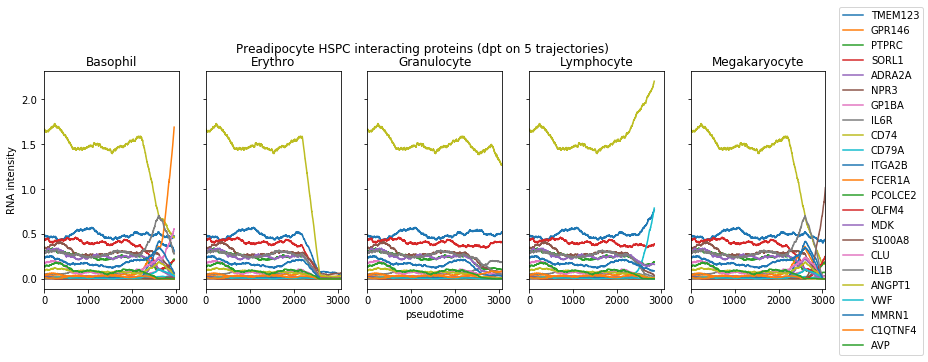

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 5, figsize = (14, 4), sharex = True, sharey = True)
p = all_protein[31, 4, 0].union(all_protein[31, 4, 1]) # Pre-adipocyte
baso.loc[:,baso.columns.isin(p)].plot(ax = ax[0], title = "Basophil")
erythro.loc[:,erythro.columns.isin(p)].plot(ax = ax[1], title = "Erythro")
granulo.loc[:,granulo.columns.isin(p)].plot(ax = ax[2], title = "Granulocyte")
ly.loc[:,ly.columns.isin(p)].plot(ax = ax[3], title = "Lymphocyte")
meg.loc[:,ly.columns.isin(p)].plot(ax = ax[4], title = "Megakaryocyte")

[a.get_legend().remove() for a in ax]

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
fig.suptitle("Preadipocyte HSPC interacting proteins (dpt on 5 trajectories)")
ax[2].set_xlabel("pseudotime")
ax[0].set_ylabel("RNA intensity")

Text(0, 0.5, 'RNA intensity')

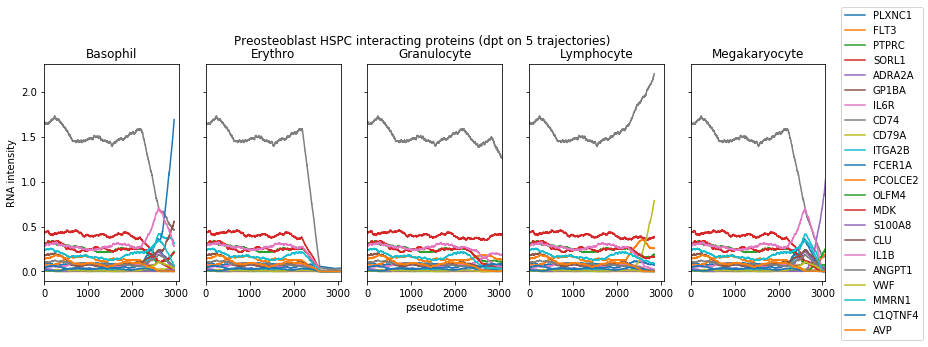

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 5, figsize = (14, 4), sharex = True, sharey = True)
p = all_protein[31, 9, 0].union(all_protein[31, 9, 1]) # Pre-adipocyte
baso.loc[:,baso.columns.isin(p)].plot(ax = ax[0], title = "Basophil")
erythro.loc[:,erythro.columns.isin(p)].plot(ax = ax[1], title = "Erythro")
granulo.loc[:,granulo.columns.isin(p)].plot(ax = ax[2], title = "Granulocyte")
ly.loc[:,ly.columns.isin(p)].plot(ax = ax[3], title = "Lymphocyte")
meg.loc[:,ly.columns.isin(p)].plot(ax = ax[4], title = "Megakaryocyte")

[a.get_legend().remove() for a in ax]

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
fig.suptitle("Preosteoblast HSPC interacting proteins (dpt on 5 trajectories)")
ax[2].set_xlabel("pseudotime")
ax[0].set_ylabel("RNA intensity")

In [28]:
# output to file for connect reactome enrichment analysic
cell_16_id = [c2c.analysis.symbol_to_entrezgene(i, lookup_table) for i in  all_protein[16,:,0]]

In [30]:
for partner in range(len(cell_16_id)):
    comma_sep = ','.join([str(i) for i in cell_16_id[partner]])
    
    with open('cell16_symbol1.txt', 'a') as f:
        f.write(comma_sep+'\n')


# Will more stringent criteria of local percentile lead to more specific interaction

In [31]:
mean_matrix_90 = pd.read_pickle('/home/hsher/c2c_output/pellin_lin_90')

In [34]:
cell_5, cell_16 = c2c.analysis.enriched_interaction(mean_matrix_90, lookup_table, cell_one = 5, cell_two = 16)

/home/hsher/miniconda3/envs/cell2cell/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


size of subset gene2go of gene2go is (62087, 8)


/home/hsher/miniconda3/envs/cell2cell/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


size of subset gene2go of gene2go is (62087, 8)


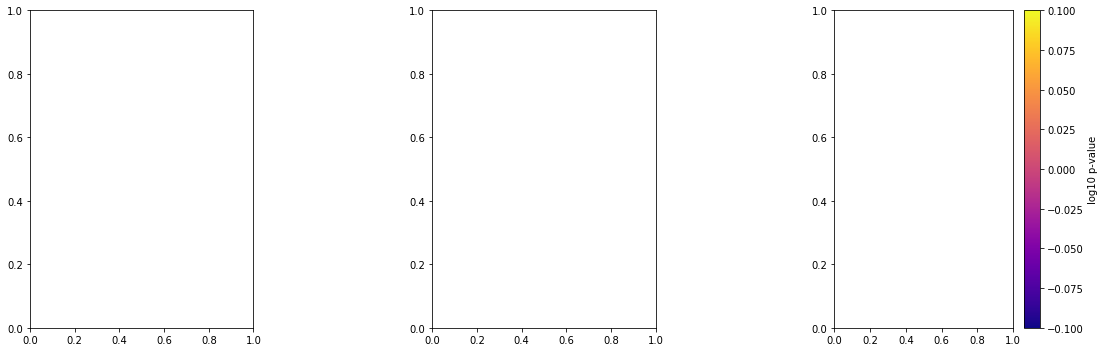

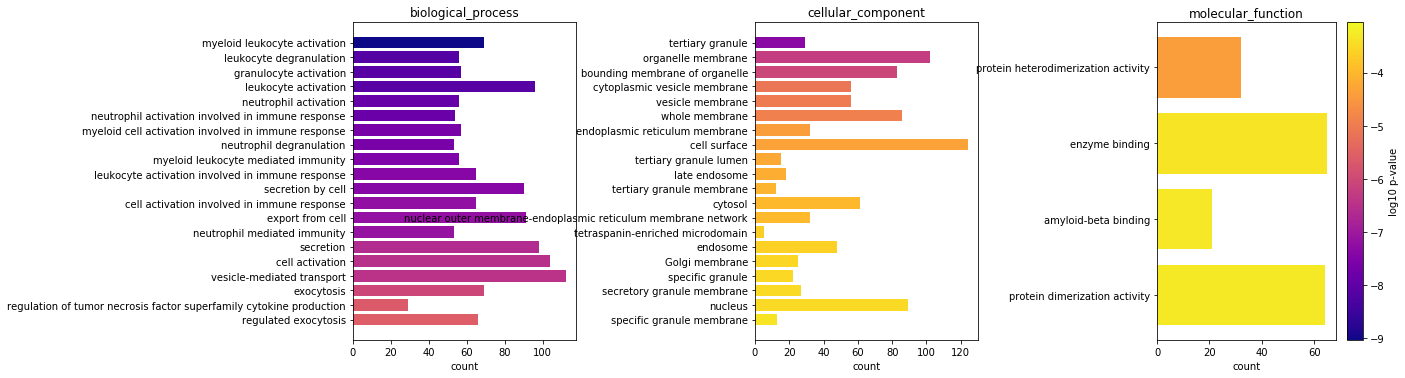

In [35]:
c2c.analysis.bar_go(cell_5)
c2c.analysis.bar_go(cell_16)

/home/hsher/miniconda3/envs/cell2cell/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


size of subset gene2go of gene2go is (62087, 8)


/home/hsher/miniconda3/envs/cell2cell/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


size of subset gene2go of gene2go is (62087, 8)


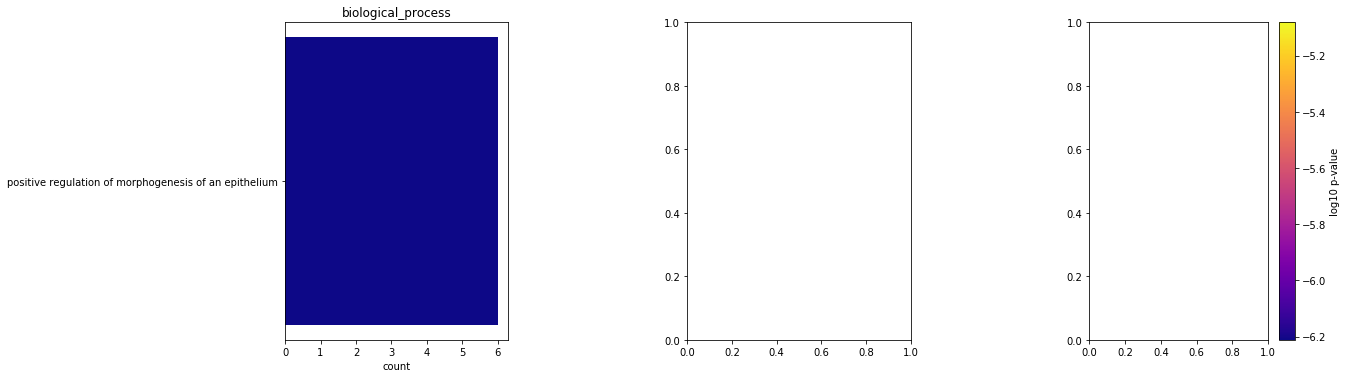

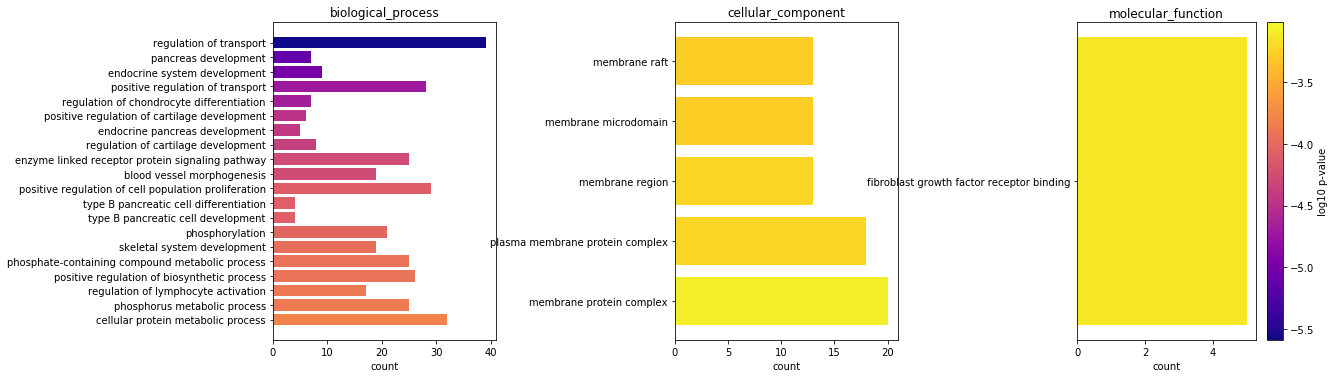

In [36]:
cell_0, cell_8 = c2c.analysis.enriched_interaction(mean_matrix_90, lookup_table, cell_one = 0, cell_two = 8)
c2c.analysis.bar_go(cell_0)
c2c.analysis.bar_go(cell_8)

In [38]:
all_protein = c2c.analysis.all_pairs_interaction(mean_matrix_90)

# output to file for connect reactome enrichment analysic
cell_16_id = [c2c.analysis.symbol_to_entrezgene(i, lookup_table) for i in  all_protein[16,:,1]]
for partner in range(len(cell_16_id)):
    comma_sep = ','.join([str(i) for i in cell_16_id[partner]])
    
    with open('cell16_symbol2_90.txt', 'a') as f:
        f.write(comma_sep+'\n')
